# Análise exploratória dos dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data.csv", encoding="latin1") #Carregamento de Dados

In [ ]:
df.shape #Verificação do Tamanho dos Dados (Linhas e Colunas)

(412977, 8)

In [ ]:
df.head() #Primeiras linhas do df e sua estrutura

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.sample(5) #Amostras aleatórias do df
#Já é possível ver valores nulos e valores faltantes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
56352,541104,22029,SPACEBOY BIRTHDAY CARD,1.0,1/13/2011 14:29,0.83,NaN,United Kingdom
201912,554347,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16.0,5/24/2011 8:21,0.65,16523.0,United Kingdom
144209,548732,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12.0,4/4/2011 10:16,0.85,16142.0,United Kingdom
134258,547830,35965,FOLKART HEART NAPKIN RINGS,2.0,3/25/2011 15:50,3.29,NaN,United Kingdom
327944,565737,22950,36 DOILIES VINTAGE CHRISTMAS,5.0,9/6/2011 12:27,1.45,16400.0,United Kingdom


In [ ]:
df.describe() #Estatísticas básicas
#Obs: Olhando para os números min e max é possível perceber que o dataset possui Outliers

,Quantity,UnitPrice,CustomerID
count,412976.000000,412976.000000,308494.000000
mean,9.826699,4.703805,15275.594511
std,172.405633,102.478833,1716.794307
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13881.000000
50%,3.000000,2.100000,15140.000000
75%,11.000000,4.130000,16782.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
df.info() #Tipos de dados e valores nulos
#Há valores nulos em CustomerID e Description
#O tipo de dado de InvoiceDate e CustomerID devem ser alterados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412977 entries, 0 to 412976
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    412977 non-null  object 
 1   StockCode    412977 non-null  object 
 2   Description  411634 non-null  object 
 3   Quantity     412976 non-null  float64
 4   InvoiceDate  412976 non-null  object 
 5   UnitPrice    412976 non-null  float64
 6   CustomerID   308494 non-null  float64
 7   Country      412976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 25.2+ MB


# Tratamento de dados

<Axes: >

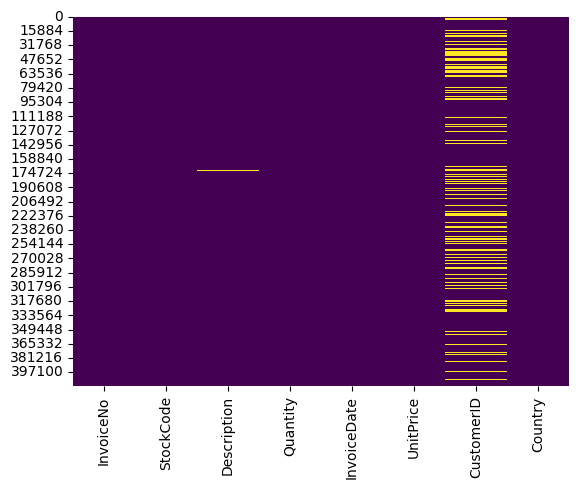

In [ ]:
sns.heatmap(df.isnull(), cmap="viridis", cbar=False) #Visão geral de nulos

In [ ]:
df = df.dropna()
#Remoção dos nulos pois substituí-los na posição dos customers poderia ocasionar em um erro de análise de clientes

In [ ]:
df.duplicated().sum() #Verificação de duplicatas


3351

In [ ]:
df.drop_duplicates(inplace=True) #Remoção de duplicatas

In [ ]:
colunas_outliers = ["Quantity", "UnitPrice",]
#Colunas anteriores que podem possuir Outliers

<Axes: >

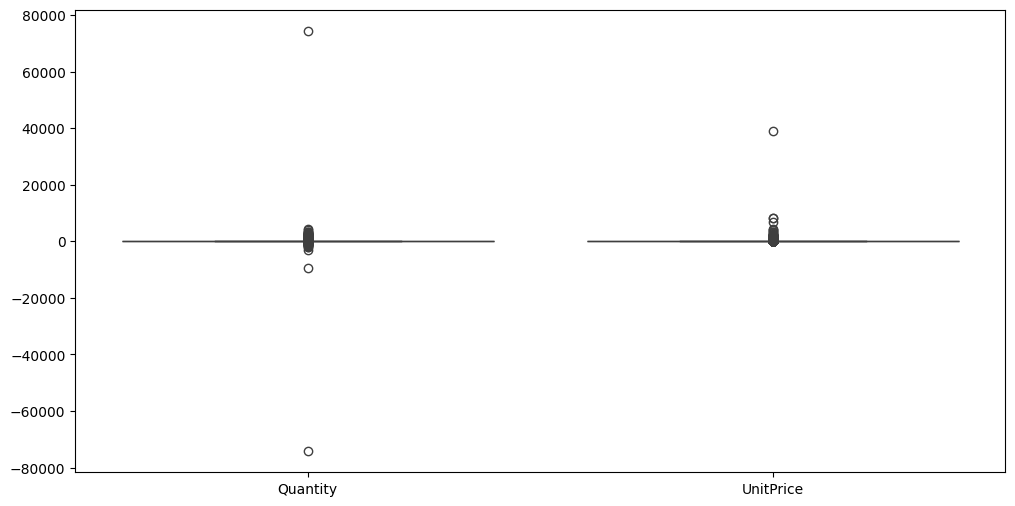

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[colunas_outliers])
#A Presença de outliers se mostra real nas colunas Quantity e UnitPrice

In [ ]:
for coluna in colunas_outliers:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

    df["Quantity"] = df["Quantity"].apply(lambda x: 0 if x < 0 else x)

    #Removendo outliers da colunas selecionadas e definindo o limite correto

<ipython-input-378-73931b869b51>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Quantity"] = df["Quantity"].apply(lambda x: 0 if x < 0 else x)


<Axes: >

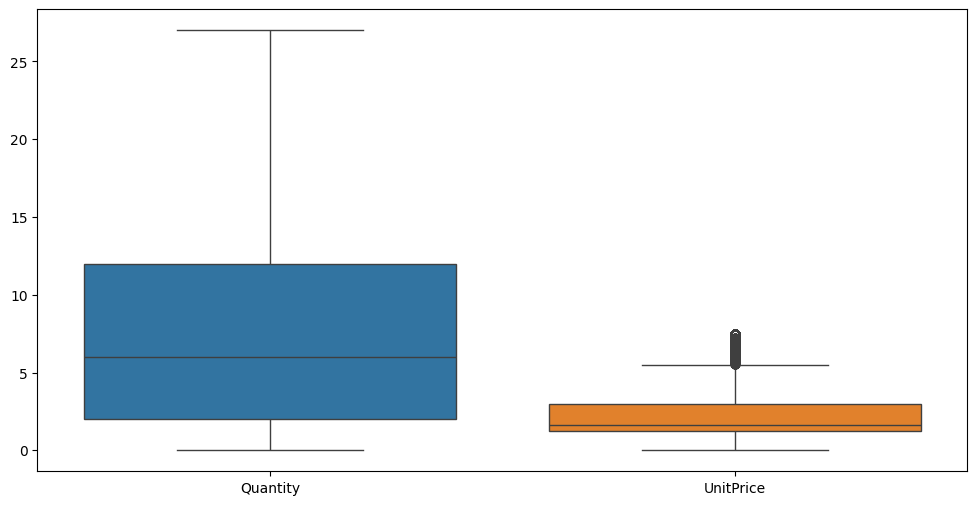

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[colunas_outliers])
#Plot do gráfico depois da correção

<Axes: xlabel='Quantity', ylabel='Count'>

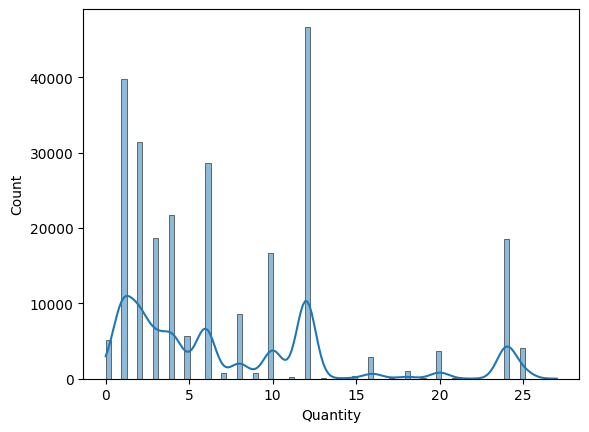

In [ ]:
sns.histplot(df['Quantity'], kde=True)
#Visualização de como as quantidades estão alocadas

In [ ]:
df["CustomerID"] = df["CustomerID"].astype(int)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
#Alteração dos tipos de dados

In [ ]:
df["total"] = df['Quantity'] * df['UnitPrice']
#Criação de uma nova coluna para facilitar o processo de clustering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255637 entries, 0 to 412975
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    255637 non-null  object        
 1   StockCode    255637 non-null  object        
 2   Description  255637 non-null  object        
 3   Quantity     255637 non-null  float64       
 4   InvoiceDate  255637 non-null  datetime64[ns]
 5   UnitPrice    255637 non-null  float64       
 6   CustomerID   255637 non-null  int64         
 7   Country      255637 non-null  object        
 8   total        255637 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 19.5+ MB


# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)
#O PCA foi usado para reduzir dimensionalidade e melhorar eficiência.

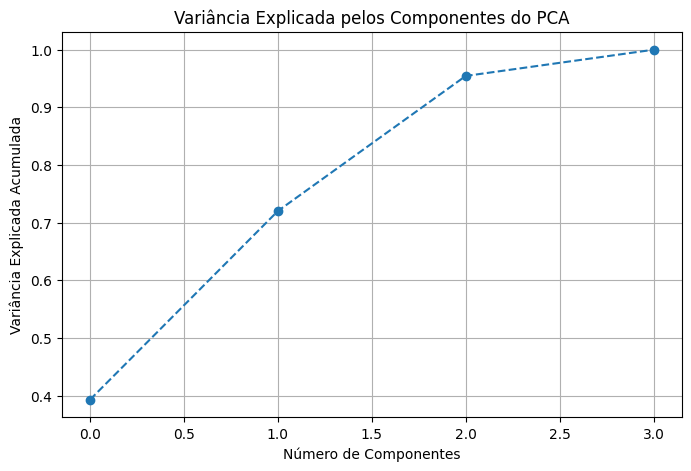

In [ ]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada pelos Componentes do PCA")
plt.grid()
plt.show()
#O gráfico foi plotado para uma melhor interpretação da análise de variância

In [ ]:
n_components = np.argmax(np.cumsum(explained_variance) >= 0.80) + 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i+1}" for i in range(n_components)])
print(pca_df)

     Quantity  UnitPrice  CustomerID     total
PC1  0.693000  -0.060316   -0.315309  0.645517
PC2 -0.322560   0.849292   -0.016475  0.417596
PC3  0.209604  -0.018326    0.948553  0.236596


In [ ]:
#Essas variáveis acima foram selecionadas porque influenciam diretamente no perfil dos clientes e no padrão de compras, facilitando a segmentação.
#Tambem foi aplicado um PCA para reduzir a dimensionalidade e capturar a maior parte da variância dos dados.
#Isso ajuda a evitar redundâncias e melhorar a eficiência da clusterização

In [ ]:
pc1_values = X_pca[:, 0]
df["PC1"] = pc1_values
#PC1 foi escolhida por ter uma alta correlação entre a quantidade comprada e o total gasto
#Ficando mais fácil de compreender o tipo de clientes que a loja possui
#Além de facilitar a visualização do quanto cada grupo de clientes gasta

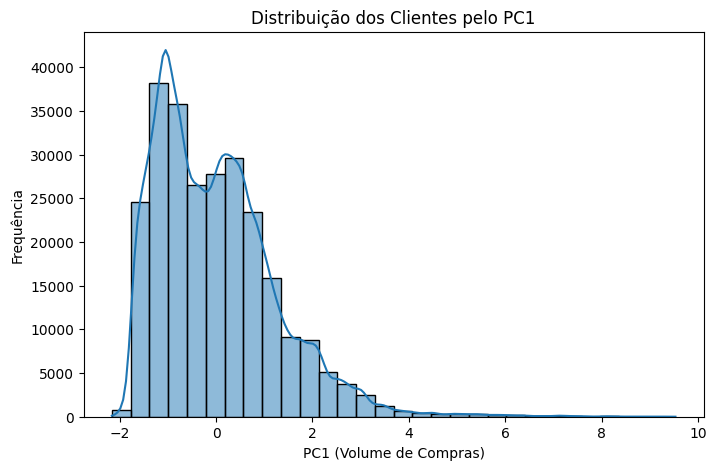

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["PC1"], bins=30, kde=True)
plt.xlabel("PC1 (Volume de Compras)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Clientes pelo PC1")
plt.show()
#Nesse gráfico temos a quantidade que é comprada pelos clientes, sendo -1 abaixo da média e 1 acima da média
#podemos ver o decaimento de vendas pela sua frequência e provavelmente a ascensão de clientes inativos

# Clustering



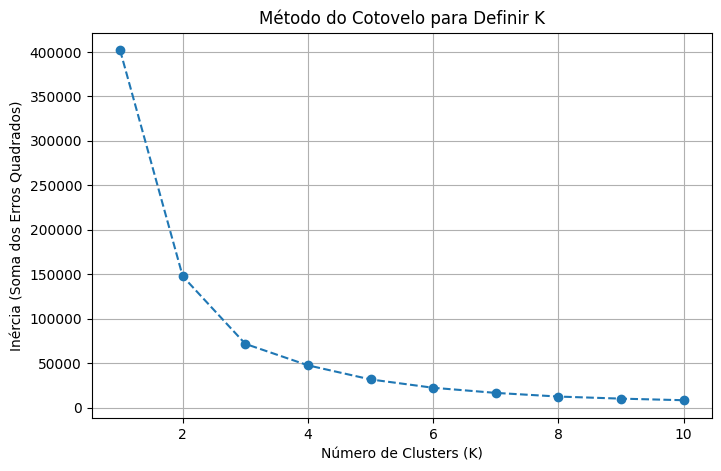

In [ ]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[["PC1"]])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia (Soma dos Erros Quadrados)")
plt.title("Método do Cotovelo para Definir K")
plt.grid()
plt.show()
#Foi utilizado o método do cotovelo para definir o número ideal de clusters

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["PC1"]])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

In [ ]:
#O uso do k-means foi por ser um dos método mais eficiente para segmentação de grandes volumes de dados.
#Como o dataset possui muitos registros, esse método tambem garante um bom desempenho computacional.
#O k-means é muito utilizado na seguimentação de clientes, pois agrupa observações similares sendo ideal para nossa base de dados.
#Em resumo o k-means criará grupos de clientes para que melhore a visualização de cada tipo e nós dê um rumo de medidas para cada grupo de cliente

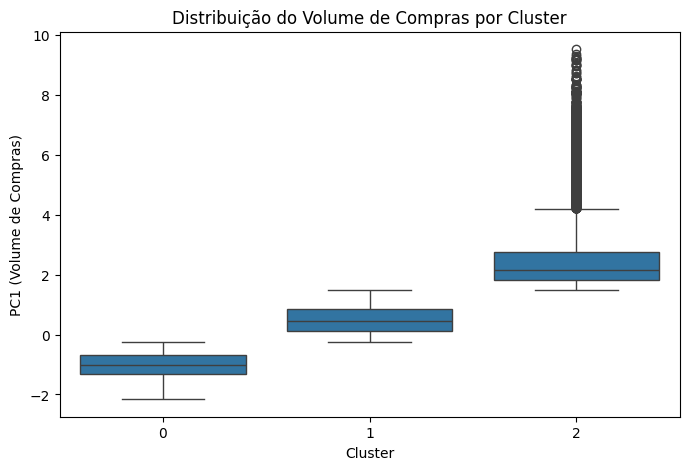

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Cluster_KMeans"], y=df["PC1"])
plt.xlabel("Cluster")
plt.ylabel("PC1 (Volume de Compras)")
plt.title("Distribuição do Volume de Compras por Cluster")
plt.show()

In [ ]:
print(f"Inércia do K-Means: {kmeans.inertia_}")

Inércia do K-Means: 45694.44499931136


In [ ]:
df.groupby("Cluster_KMeans")["PC1"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_KMeans,,,,,,,,
0,123460.0,-1.003746,0.403429,-2.160411,-1.312492,-1.012864,-0.694185,-0.251891
1,102629.0,0.496033,0.454263,-0.251795,0.119333,0.451832,0.840078,1.486926
2,29548.0,2.471066,1.017095,1.487008,1.806360,2.154978,2.766643,9.525958


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[["PC1"]], df["Cluster_KMeans"])
print(f"Índice de Silhueta: {silhouette_avg:.4f}")
#O índice de silhueta foi calculado para validar a qualidade da segmentação

Índice de Silhueta: 0.6010


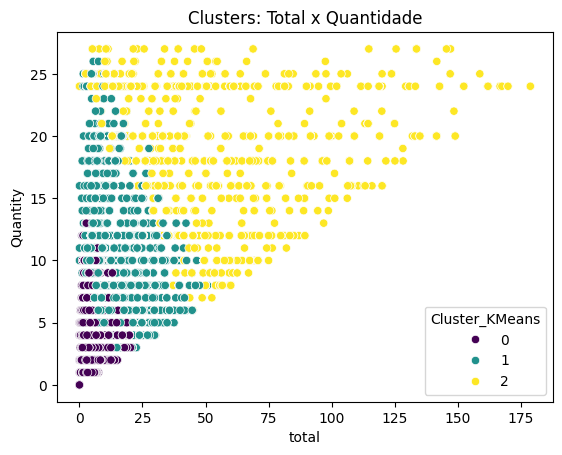

In [ ]:
sns.scatterplot(x=df["total"], y=df["Quantity"], hue=df["Cluster_KMeans"], palette="viridis")
plt.title("Clusters: Total x Quantidade")
plt.show()
#O gráfico facilita o entendimento de que tipo de clientes são os 0, 1 e 2
#E como eles se comportam

In [ ]:
df["Cluster_KMeans"].value_counts()
#Quantidade total de clientes por grupo de cluster

,count
Cluster_KMeans,
0,123460
1,102629
2,29548


In [ ]:
df["Cluster_KMeans"].value_counts(normalize=True) * 100
#Porcentagem da quantidade de clientes por grupos de cluester

,proportion
Cluster_KMeans,
0,48.295043
1,40.146379
2,11.558577


In [ ]:
#Podemos perceber pelo gráfico acima que:
#Os 0 são pequenos compradores, que fazem compras de baixo(a) valor/quantidade
#Os 1 são os compradores regulares, que compram uma quantidade média de produtos
#Já os 2 são compradores de alta quantidade e valor

#Com essa visão estabelecida podemos utilizar a seguinte estratégia para cada cliente:
#Para os pequenos compradores podemos oferecer promoções para aumentar o ticket médio e torná-los clientes regulares
#Já para os clientes regulares poderá ser criado um programa de fidelidade para aumentar retenção
#Por fim os grandes compradores podem receber atendimento exclusivo e descontos especiais também com o intuito de manter esses clientes